In [19]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [20]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [21]:
plt.rc("font", family="Malgun Gothic")

In [22]:
OECD_traffic_accident_sql = """
    SELECT
        country,
        (death_car_2019 + death_car_2020 + death_car_2021) / 3 AS average_death
    FROM
        `calcium-channel-428804-c3.traffic_accident.OECD_traffic_accident_3`
    ORDER BY
        average_death DESC
    LIMIT
        33;
"""

In [23]:
OECD_traffic_accident_df = client.query(OECD_traffic_accident_sql).to_dataframe()
OECD_traffic_accident_df = OECD_traffic_accident_df.set_index("country")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [24]:
OECD_traffic_accident_df

,average_death
country,
콜롬비아,4.000000
칠레,3.400000
코스타리카,2.700000
멕시코,1.866667
미국,1.300000
헝가리,1.133333
대한민국,1.100000
리투아니아,0.966667
이스라엘,0.900000


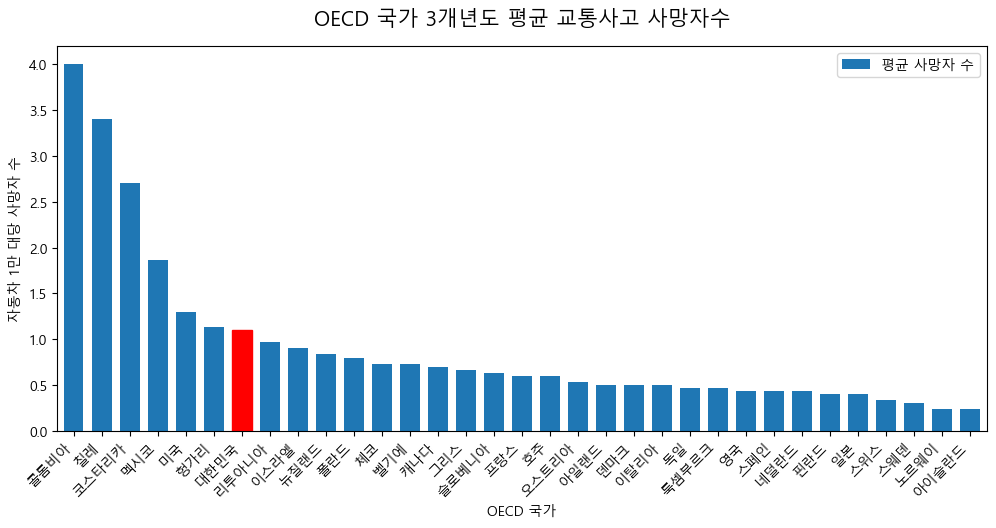

In [34]:
ax = OECD_traffic_accident_df["average_death"].plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, country in zip(ax.patches, OECD_traffic_accident_df.index):
    if country == "대한민국":
        bar.set_color("red")

plt.title("OECD 국가 3개년도 평균 교통사고 사망자수", size=15, pad=15)
plt.xlabel("OECD 국가")
plt.ylabel("자동차 1만 대당 사망자 수")
plt.xticks(rotation=45, ha="right")
plt.legend(["평균 사망자 수"], loc="best")
plt.savefig("./result/OECD_traffic_accident_v3.png", bbox_inches="tight")

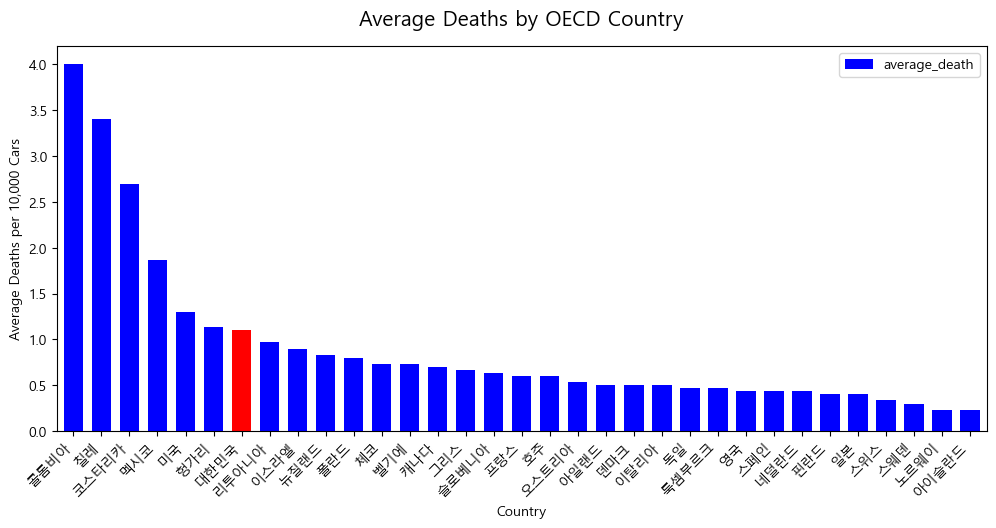

In [31]:
colors = ["red" if country == "대한민국" else "blue" for country in OECD_traffic_accident_df.index]
OECD_traffic_accident_df["average_death"].plot(kind="bar", color=colors, width=0.7, figsize=(12, 5))

plt.title("Average Deaths by OECD Country", size=15, pad=15)
plt.xlabel("Country")
plt.ylabel("Average Deaths per 10,000 Cars")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.savefig("./result/OECD_traffic_accident_v2.png", bbox_inches="tight")

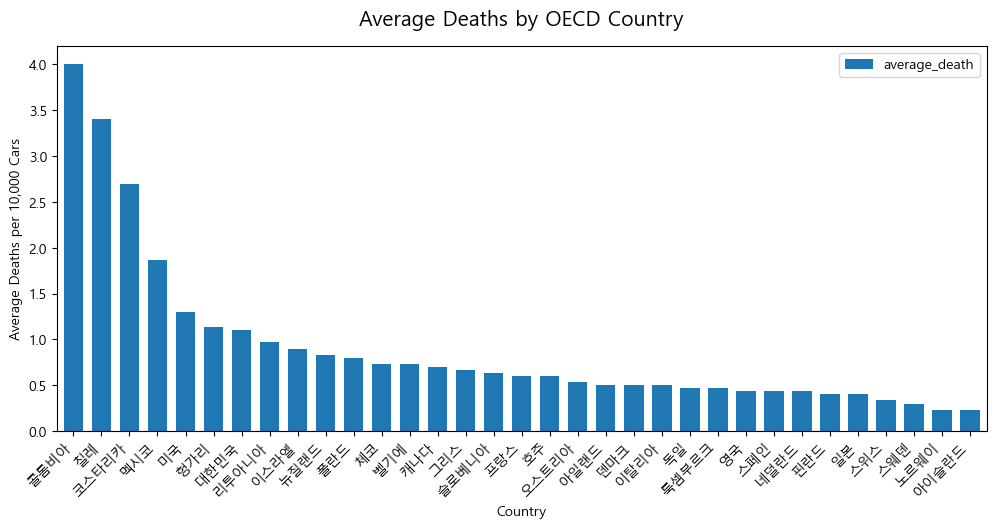

In [32]:
OECD_traffic_accident_df["average_death"].plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("Average Deaths by OECD Country", size=15, pad=15)
plt.xlabel("Country")
plt.ylabel("Average Deaths per 10,000 Cars")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.savefig("./result/OECD_traffic_accident_v1.png", bbox_inches="tight")